Neste notebook realizaremos o protótipo da leitura dos arquivos do dataset 
de caracteres japoneses escritos a mão.

Começaremos com as definições básicas do caminho do arquio e importação de módulos auxiliares necessários.


In [1]:
FILE_NAME = "/Users/harielgiacomuzzi/Google Drive/Deep Learning/Hiragana-Recognizer/data/ETL8G/ETL8G_01"

import struct
from PIL import Image

agora abrimos o arquivo em modo de leitura e extraimos os dados de um único registro para testes.
as informações sobre o formato dos dados estão dispostas [aqui](http://etlcdb.db.aist.go.jp/?page_id=2461)

In [2]:
record_raw = None
with open(FILE_NAME, 'r') as file:
    record_id = 0
    record_size = 8199 # this information was taken from the dataset definition
    file.seek(record_id * record_size)
    record_raw = file.read(record_size)

uma vez que temos os dados brutos do registro, podemos fazer a descompressão dos dados e encodar a imagem novamente para um formato que possa ser visualizada.

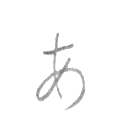

In [13]:
record_raw = struct.unpack('>2H8sI4B4H2B30x8128s11x', record_raw)
aux_image = Image.frombytes('F', (128, 127), record_raw[14], 'bit', 4)
aux_image = aux_image.convert('L')
record_image = Image.eval(aux_image, lambda x: 255-x*16)
record_image

e também podemos acessar os metadados do registro através do objeto record_raw que agora estando descompactado é uma lista com os atributos contidos nos metadados do registro.

In [15]:
record_raw[2]

'A.HIRA  '